<a href="https://colab.research.google.com/github/lindseyvanosky/KMeans-Find-K-Exercise/blob/main/LV_KMeans_Find_K_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KMeans: Find K 
- Lindsey Vanosky 
- 07.19.22

##Import, Upload & Inspect 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


filename = "/content/drive/MyDrive/Coding Dojo/03 Stack 3: Advanced Machine Learning/Data Sets/cust_seg.csv"
df = pd.read_csv(filename)
df.head(10)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2
5,5,6,40,1,23,81,0.998,7.831,NaN,10.9
6,6,7,38,2,4,56,0.442,0.454,0.0,1.6
7,7,8,42,3,0,64,0.279,3.945,0.0,6.6
8,8,9,26,1,5,18,0.575,2.215,NaN,15.5
9,9,10,47,3,23,115,0.653,3.947,0.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


###Data Clean Up

In [ ]:
df.drop(columns = ["Unnamed: 0", "Customer Id"], inplace = True)

These columns do not provide us with any relevant information. 

In [ ]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [ ]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [ ]:
df["Defaulted"].fillna(3.0, inplace = True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [ ]:
df["Defaulted"].value_counts()

0.0    517
1.0    183
3.0    150
Name: Defaulted, dtype: int64

##Preprocessing

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

##Elbow Plot of Inertia

In [ ]:
inertias = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)

###Visualization - Elbow Plot

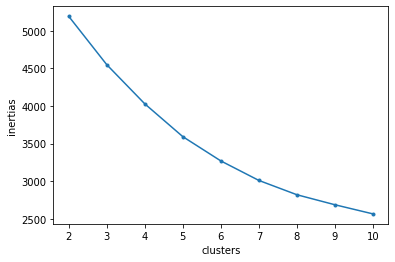

In [ ]:
plt.plot(range(2, 11), inertias, marker = ".")
plt.xlabel("clusters")
plt.ylabel("inertias");

##Silhouette Score

In [ ]:
silhouette_scores = []

for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

###Visualization  

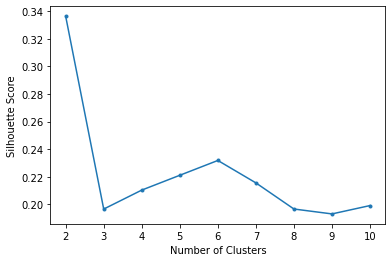

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker = ".")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score");

##Determining Best Kmeans

Given that we saw different results between our inertia (4) and our silhouette score (2), we will test 2 - 4 and visualize on a scatter plot.  

In [ ]:
kmeans2 = KMeans(n_clusters = 2, random_state = 42)
kmeans3 = KMeans(n_clusters = 3, random_state = 42)
kmeans4 = KMeans(n_clusters = 4, random_state = 42)
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)
kmeans4.fit(scaled_df);

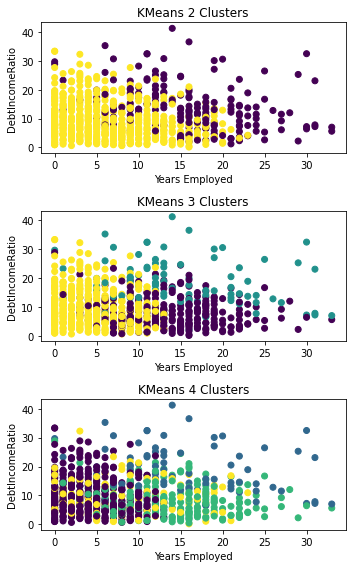

In [ ]:
df["cluster2"] = kmeans2.labels_
df["cluster3"] = kmeans3.labels_
df["cluster4"] = kmeans4.labels_

fig, axes = plt.subplots(3, 1, figsize = (5,8))

axes[0].scatter(df["Years Employed"], df["DebtIncomeRatio"], c = df["cluster2"])
axes[0].set_xlabel("Years Employed")
axes[0].set_ylabel("DebtIncomeRatio")
axes[0].set_title("KMeans 2 Clusters")

axes[1].scatter(df["Years Employed"], df["DebtIncomeRatio"], c = df["cluster3"])
axes[1].set_xlabel("Years Employed")
axes[1].set_ylabel("DebtIncomeRatio")
axes[1].set_title("KMeans 3 Clusters")

axes[2].scatter(df["Years Employed"], df["DebtIncomeRatio"], c = df["cluster4"])
axes[2].set_xlabel("Years Employed")
axes[2].set_ylabel("DebtIncomeRatio")
axes[2].set_title("KMeans 4 Clusters")

plt.tight_layout();

Looking at this visualization, I think that a KMeans of 3 is best. However, I believe this is due to the fact that I created a new category by imputing UKNWN values in the "Defaulted" column to be a third option. I thought it might be intersesting to see if there were any patterns amungst the unknowns.
<br></br>
Depending upon the business problem, 2 may provide better results. 

#Analysis of KMeans
- Lindsey Vanosky 
- 07.21.22

In [ ]:
kmeans_new = KMeans(n_clusters = 3, random_state = 42)
kmeans_new.fit(scaled_df)
df.drop(columns=["cluster2", "cluster3", "cluster4"], inplace = True)
df["cluster new"] = kmeans_new.labels_
cluster_groups = df.groupby("cluster new", as_index = False).mean()
cluster_groups

,cluster new,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,41.729927,1.591241,13.777372,60.463504,1.429894,3.030077,0.645985,8.179562
1,1,40.639535,2.162791,15.395349,107.511628,5.878384,10.409919,0.883721,18.439535
2,2,30.297959,1.697959,4.453061,28.287755,0.904010,1.819312,0.775510,9.834490


###Visualization

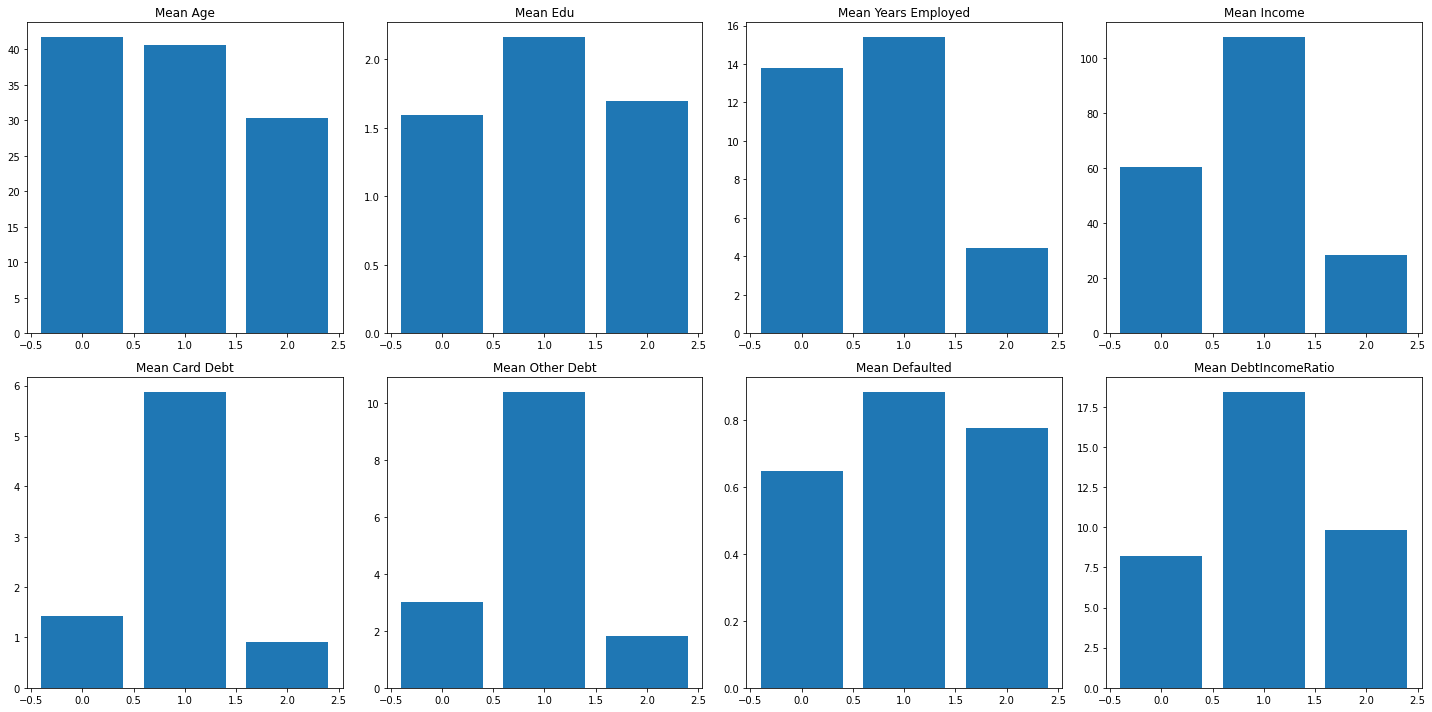

In [ ]:
fig, axes = plt.subplots(2,4, figsize = (20,10))
axes = axes.ravel()

for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups["cluster new"], cluster_groups[col])
  axes[i].set_title(f"Mean {col}")
  plt.tight_layout();

Here is what we can extrapolate from the graph above: 
<br></br>
**Group 0** is middle aged, experienced and gainfully employed with a blue collar job. Potentially lives in the suburbs. They do not have a lot of debt, credit card or otherwise.  Lowest debt to imcome, lowest percentage of defaults. 
<br></br>
**Group 1** is also middle aged. They are also highly educated. They are career established with white collar/management jobs. They also carry a high amount of debt - both credit card and outside debt. They like to spend their earnings, but also likely have student loans and mortgages. They have a high default percentage, as well as a high debt to income ratio.
<br></br>
**Group 2** consists of young adults with entry level jobs, working on building their careers. Low card debt, not a ton of disposable income. Low other debt, however they also have a high default percentage so they may have student loans. 